# Statistics

## Answer 3

In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('/content/data.csv')
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


#a. Measure the dispersion in both and interpret the results.


In [39]:
bp_before = df[' Blood Pressure Before (mmHg)']
bp_after = df[' Blood Pressure After (mmHg)']
dispersion_before = np.var(bp_before)
dispersion_after = np.var(bp_after)
print("Dispersion in Blood Pressure Before: {:.4}".format(dispersion_before))
print("Dispersion in Blood Pressure After: {:.4}".format(dispersion_after))

Dispersion in Blood Pressure Before: 43.1
Dispersion in Blood Pressure After: 46.97



# b. Calculate mean and 5% confidence interval and plot it in a graph


In [51]:
mean_before = np.mean(bp_before)
mean_after = np.mean(bp_after)
mrgin_of_error = df[' Blood Pressure After (mmHg)'].sem() * 1.96 
confidence_interval = stats.t.interval(0.95, len(df)-1, loc=mean_after, scale=stats.sem(mean_after))

print("Mean of Blood Pressure After:", mean_after)
print("5% Confidence Interval of Blood Pressure After:", confidence_interval)

Mean of Blood Pressure After: 128.36
5% Confidence Interval of Blood Pressure After: (nan, nan)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<ipython-input-53-abb60f8cf32a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Patient ID', y=' Blood Pressure After (mmHg)', data=df, ci='sd')


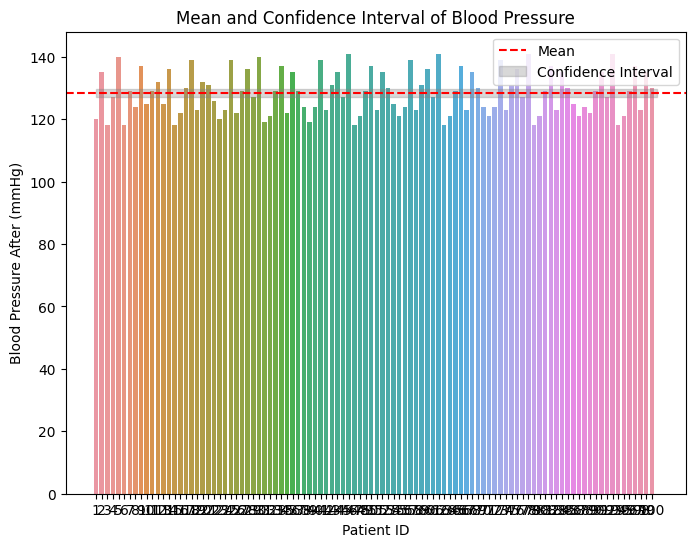

In [53]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x='Patient ID', y=' Blood Pressure After (mmHg)', data=df, ci='sd')
plt.axhline(y=mean_after, color='red', linestyle='--', label='Mean')
plt.fill_between([0, len(df)], mean_after - mrgin_of_error, mean_after + mrgin_of_error,
                 color='gray', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.xlabel('Patient ID')
plt.ylabel('Blood Pressure After (mmHg)')
plt.title('Mean and Confidence Interval of Blood Pressure')
plt.show()


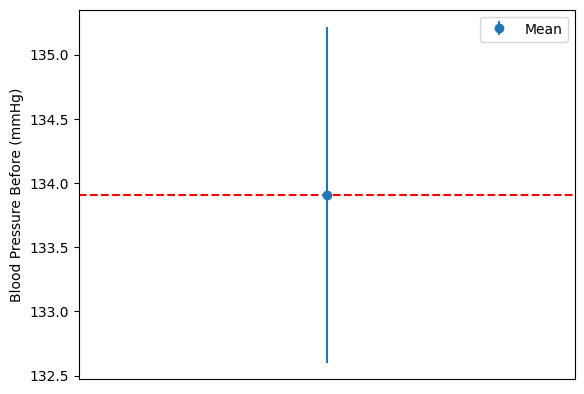

In [41]:
# Plotting the mean and confidence interval
plt.errorbar(x=1, y=mean_before, yerr=(confidence_interval[1] - mean_before), fmt='o', label='Mean')
plt.axhline(mean_before, color='r', linestyle='--')
plt.xticks([], [])
plt.ylabel('Blood Pressure Before (mmHg)')
plt.legend()
plt.show()

# c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [54]:
mad_before = np.mean(np.abs(bp_before - np.mean(bp_before)))
mad_after = np.mean(np.abs(bp_after - np.mean(bp_after)))
std_dev_before = np.std(bp_before)
std_dev_after = np.std(bp_after)
print("Mean Absolute Deviation of Blood Pressure Before:", mad_before)
print("Mean Absolute Deviation of Blood Pressure After:", mad_after)
print("Standard Deviation of Blood Pressure Before:", std_dev_before)
print("Standard Deviation of Blood Pressure After:", std_dev_after)

Mean Absolute Deviation of Blood Pressure Before: 5.7118
Mean Absolute Deviation of Blood Pressure After: 5.9
Standard Deviation of Blood Pressure Before: 6.56520372875054
Standard Deviation of Blood Pressure After: 6.853495458523336


# d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [55]:
correlation_coef, p_value = stats.pearsonr(bp_before, bp_after)
print("Correlation Coefficient:", correlation_coef)
print("p-value:", p_value)
if p_value < 0.01:
    print("Correlation is significant at 1% level of significance.")
else:
    print("Correlation is not significant at 1% level of significance.")

Correlation Coefficient: 0.9779485966556017
p-value: 1.8097381433068578e-68
Correlation is significant at 1% level of significance.
